In [107]:
import numpy as np

In [108]:
import math

In [109]:
import matplotlib.pyplot as plt

In [110]:
from sympy import *
t = Symbol('t')
x = (1/2 - (16*t**2 + 1)**(0.5)/2)/(4*t) - 1/(4*t)
y = ((16*t**2 + 1)**(0.5)/2 + 1/2)/(4*t) - 1/(4*t)
f = (4*(x**2)+1)**(-0.5)
g = (4*(y**2)+1)**(-0.5)
print(f)
print(g)

(4*((0.5 - (16*t**2 + 1)**0.5/2)/(4*t) - 1/(4*t))**2 + 1)**(-0.5)
(4*(((16*t**2 + 1)**0.5/2 + 0.5)/(4*t) - 1/(4*t))**2 + 1)**(-0.5)


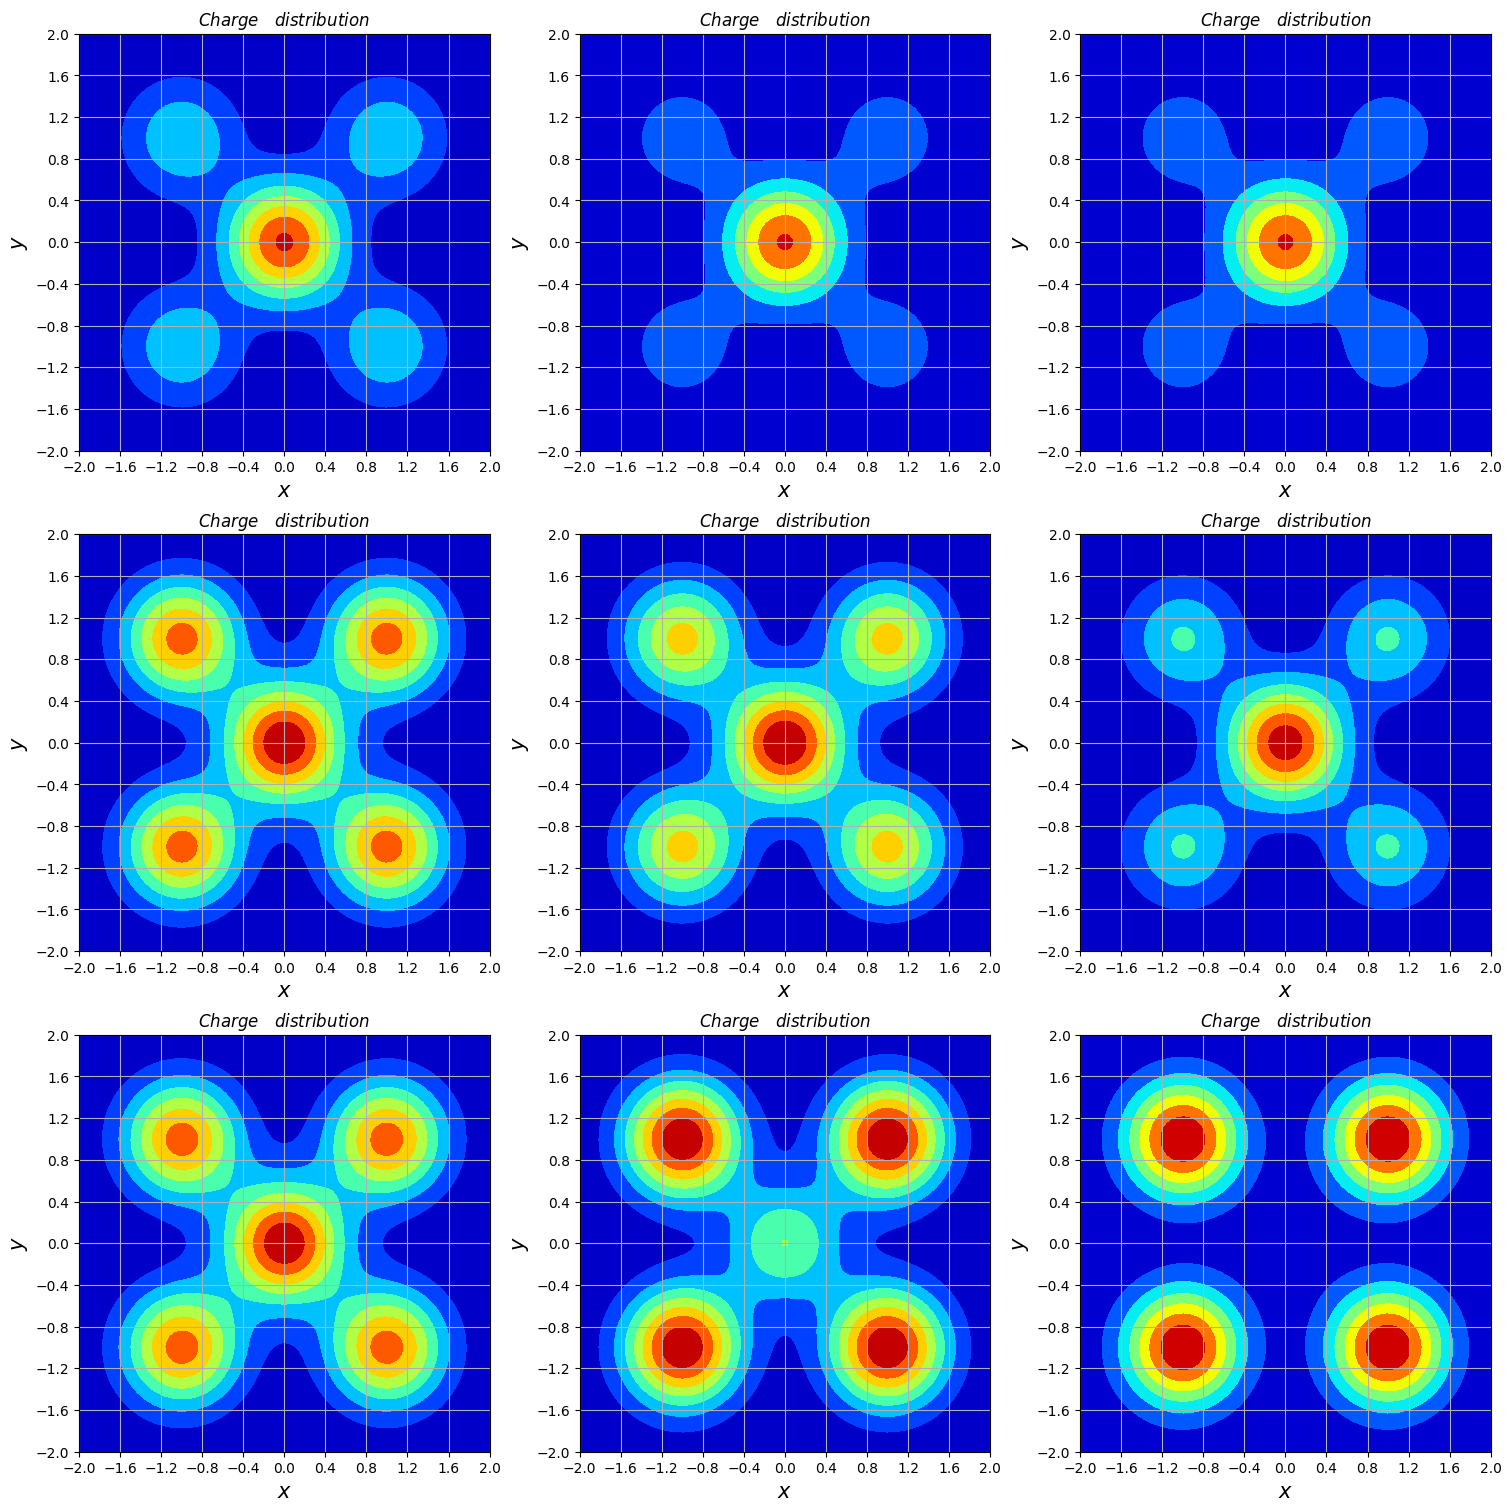

In [111]:
x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x,y)

def E1(t):
    return 1/2 - (16*t**2 + 1)**0.5/2

def E2(t):
    return 1/2 + (16*t**2 + 1)**0.5/2

E3 = 0

def T11(t):
    return (4*((0.5 - (16*t**2 + 1)**(0.5)/2)/(4*t) - 1/(4*t))**2 + 1)**(-0.5)*((0.5 - (16*t**2 + 1)**(0.5)/2)/(4*t) - 1/(4*t))

def T12(t):
    return (4*(((16*t**2 + 1)**(0.5)/2 + 0.5)/(4*t) - 1/(4*t))**2 + 1)**(-0.5)*(((16*t**2 + 1)**(0.5)/2 + 0.5)/(4*t) - 1/(4*t))

T13 = 2**(-0.5)

def T51(t):
    return (4*((0.5 - (16*t**2 + 1)**(0.5)/2)/(4*t) - 1/(4*t))**2 + 1)**(-0.5)

def T52(t):
    return (4*(((16*t**2 + 1)**(0.5)/2 + 0.5)/(4*t) - 1/(4*t))**2 + 1)**(-0.5)

T53 = 0

def B1(b):
    return np.exp(-b*E1(t))

def B2(b):
    return np.exp(-b*E2(t))

def B3(b):
    return np.exp(-b*E3)

numbers = [1,0,-1]
Numbers = [-1,0,1]

t_list = [10 ** k for k in numbers]
b_list = [10 ** l for l in Numbers]

P0 = [[None for _ in range(3)] for _ in range (3)]
for i, t in enumerate(t_list):
    for j, b in enumerate(b_list):
        f = (B1(b)+B2(b)+B3(b))**-1
        R1 = np.exp(-np.pi*((X-1)**2 + (Y-1)**2))*(B1(b)*T11(t)*T11(t)+B2(b)*T12(t)*T12(t)+B3(b)*T13*T13)
        R2 = np.exp(-np.pi*((X+1)**2 + (Y-1)**2))*(B1(b)*T11(t)*T11(t)+B2(b)*T12(t)*T12(t)+B3(b)*T13*T13)
        R3 = np.exp(-np.pi*((X+1)**2 + (Y+1)**2))*(B1(b)*T11(t)*T11(t)+B2(b)*T12(t)*T12(t)+B3(b)*T13*T13)
        R4 = np.exp(-np.pi*((X-1)**2 + (Y+1)**2))*(B1(b)*T11(t)*T11(t)+B2(b)*T12(t)*T12(t)+B3(b)*T13*T13)
        R5 = np.exp(-np.pi*((X)**2 + (Y)**2))*(B1(b)*T51(t)*T51(t)+B2(b)*T52(t)*T52(t)+B3(b)*T53*T53)
        P0[i][j] = f*(R1+R2+R3+R4+R5)

fig, axes = plt.subplots(3, 3, figsize=(15, 15), constrained_layout=True)
for i in range(3):
    for j in range(3):
        axes[i][j].set_title(r"$Charge \quad distribution$")
        axes[i][j].set_xlabel(r"$x$", fontsize=15) 
        axes[i][j].set_ylabel(r"$y$", fontsize=15)

        axes[i][j].set_xlim([-2, 2])
        axes[i][j].set_ylim([-2, 2])
        axes[i][j].set_xticks(np.linspace(-2, 2, 11))
        axes[i][j].set_yticks(np.linspace(-2, 2, 11))
        axes[i][j].grid()
        l = P0[i][j]
        axes[i][j].contourf(X, Y, l, cmap='jet')

In [114]:
numbers = [1,0,-1]
Numbers = [-1,0,1]

t_list = [10 ** k for k in numbers]
b_list = [10 ** l for l in Numbers]

for t in t_list:
    for b in b_list:
        print(t, b)

10 0.1
10 1
10 10
1 0.1
1 1
1 10
0.1 0.1
0.1 1
0.1 10


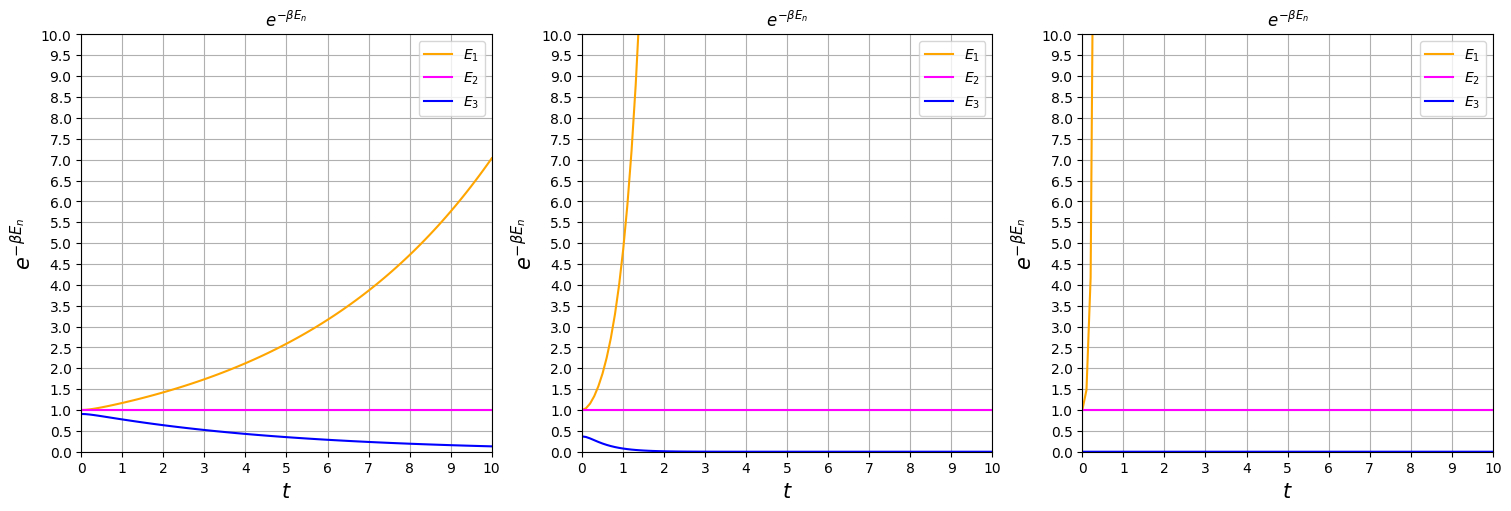

In [113]:
x = np.linspace(0, 10, 100)

def E1(x):
    return 1/2 - (16*x**2 + 1)**0.5/2

def E2(x):
    return 1/2 + (16*x**2 + 1)**0.5/2

E3 = 0

def B1(b):
    return np.exp(-b*E1(x))
    
def B2(b):
    return np.exp(-b*E2(x))
        
def B3(b):
    return np.exp(-b*E3)

Numbers = [-1,0,1]

b_list = [10 ** l for l in Numbers]

V1,V2,V3 = [[None for _ in range(3)] for _ in range (3)]
for i, b in enumerate(b_list):
    V1[i] = B1(b)
    V2[i] = B2(b)
    V3[i] = B3(b)

fig, axes = plt.subplots(1, 3, figsize=(15, 5), constrained_layout=True)
for i in range(3):
    axes[i].set_title(r"$e^{-\beta E_n}$")
    axes[i].set_xlabel(r"$t$", fontsize=15) 
    axes[i].set_ylabel(r"$e^{-\beta E_n}$", fontsize=15)
    axes[i].set_xlim([0, 10])
    axes[i].set_ylim([0, 10])
    axes[i].set_xticks(np.linspace(0, 10, 11))
    axes[i].set_yticks(np.linspace(0, 10, 21))
    axes[i].grid()
    ims=[]
    im1 = axes[i].plot(x, V1[i], color='orange')
    im2 = axes[i].axhline(V3[i], color = 'magenta') 
    im3 = axes[i].plot(x, V2[i], color='blue')
    axes[i].legend(['$E_1$','$E_2$','$E_3$'])

plt.show()